# 头盔设计
假设头盔编号区域的比例是4:3，
则长宽比为1.33

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageEnhance
from PIL import Image
import math

In [2]:
path='test9.jpg'

In [3]:
gaussian_kernel = (3,3)

#对于大部分例子（12,1）最好
close_kernelX = (12,1)

erode_kernelY = (1,14)

# 读取

<class 'numpy.ndarray'>


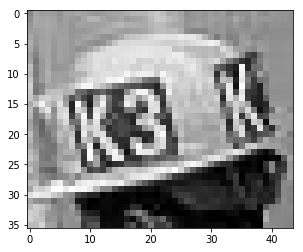

In [4]:
raw_img = cv2.imread(path)
raw_img_copy = raw_img.copy()
raw_img = raw_img[:,:,[2,1,0]]
plt.imshow(raw_img)
print(type(raw_img))

# 直方图均衡化

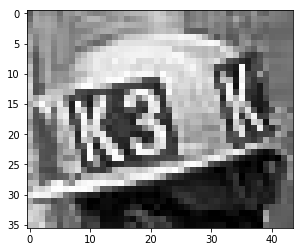

In [5]:
#gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
gray_hist = cv2.equalizeHist(gray_img)
plt.imshow(gray_hist,'gray')

# 对比度增强

<class 'numpy.ndarray'>


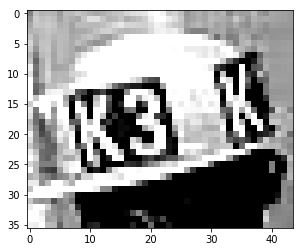

In [6]:
# 对比度增强
# image_copy = Image.fromarray(gray_hist.astype('uint8')).convert('RGB')
image_copy = Image.open(path)
enh_con = ImageEnhance.Contrast(image_copy)
contrast = 2
image_contrasted = enh_con.enhance(contrast)
image_contrasted = np.array(image_contrasted)
plt.imshow(image_contrasted)
print(type(image_contrasted))

# 灰度化

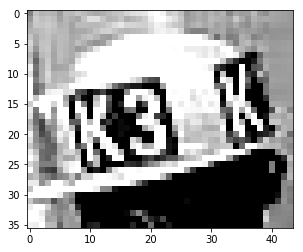

In [7]:
#gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.cvtColor(image_contrasted, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,'gray')

In [8]:
# equ = cv2.equalizeHist(gray_img)
# plt.imshow(equ,'gray')

# 高斯模糊

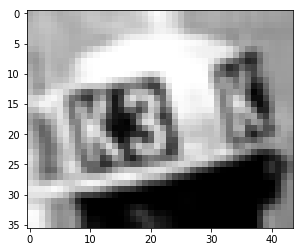

In [9]:
blurred = cv2.GaussianBlur(gray_img, gaussian_kernel, 0)
plt.imshow(blurred,'gray')

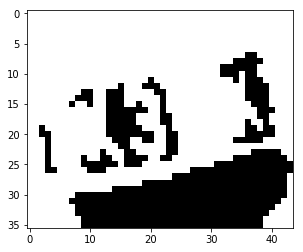

In [10]:
ret, binary111 = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
#ret, binary = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)
plt.imshow(binary111, 'gray')

# Canny算子轮廓

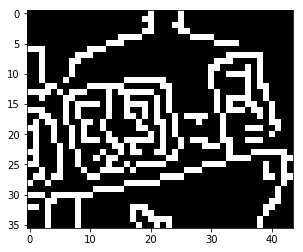

In [11]:
xgrad = cv2.Sobel(blurred, cv2.CV_16SC1, 1, 0)
ygrad = cv2.Sobel(blurred, cv2.CV_16SC1, 0, 1)
edge = cv2.Canny(xgrad, ygrad, 50, 150)
#cv.imshow("color边缘",edge_output)
plt.imshow(edge,'gray')

# sobel算子轮廓

<class 'numpy.ndarray'>


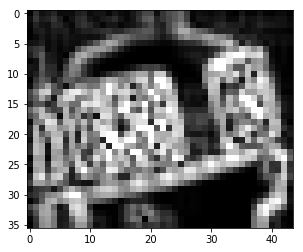

In [12]:
Sobel_x = cv2.Sobel(blurred, cv2.CV_16S, 1, 0)
Sobel_y = cv2.Sobel(blurred, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(Sobel_x)  # 转回uint8
absY = cv2.convertScaleAbs(Sobel_y)
dst = cv2.addWeighted(absX, 0.6, absY, 0.4, 0)
plt.imshow(dst,'gray')
print(type(blurred))

# dst = cv2.Sobel(blurred,cv2.CV_16S,1,0)
# dst = cv2.convertScaleAbs(dst)
# plt.imshow(dst,'gray')
# print(type(blurred))

# 二值化

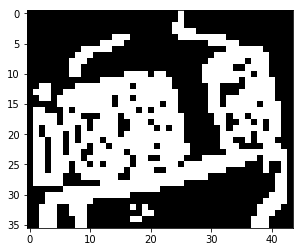

In [13]:
#canny算子
#ret, binary = cv2.threshold(edge, 0, 255, cv2.THRESH_OTSU)

#sobel算子
ret, binary = cv2.threshold(dst, 0, 255, cv2.THRESH_OTSU)
#ret, binary = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)
plt.imshow(binary, 'gray')

# 闭运算 填充非联通区域（先膨胀再腐蚀）

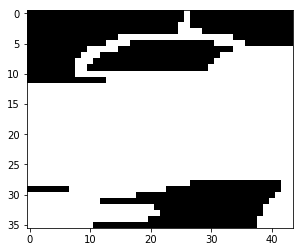

In [14]:
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, close_kernelX)
close_image = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernelX)
plt.imshow(close_image,'gray')

# 开运算 消除干扰 （先腐蚀后膨胀）

## x方向

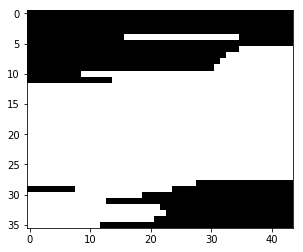

In [15]:
#定义核
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, erode_kernelY)


#x方向先膨胀再腐蚀
image = cv2.erode(close_image, kernelX)
image = cv2.dilate(image, kernelX)

#image = cv2.erode(image, kernelX)

plt.imshow(image,'gray')


## y方向

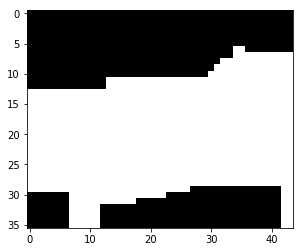

In [16]:
#y方向先膨胀再腐蚀
image = cv2.erode(close_image, kernelY)
image = cv2.dilate(image, kernelY)

#image = cv2.erode(image, kernelX)

plt.imshow(image,'gray')

# 去除竖的干扰

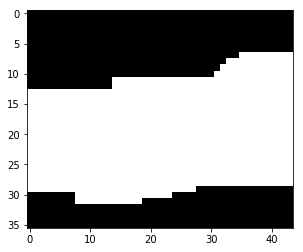

In [17]:
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
final_img = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernelX)
plt.imshow(final_img,'gray')

## 对比原图

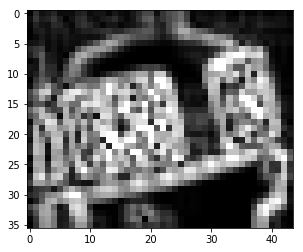

In [18]:
plt.imshow(dst,'gray')

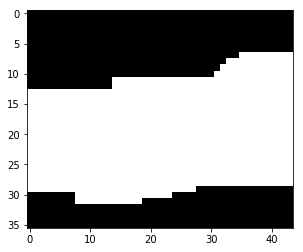

In [19]:
plt.imshow(final_img,'gray')

In [20]:
#定义显示函数
def show(name, img):
    cv2.namedWindow(name, 0)
    cv2.imshow(name, img)
    cv2.waitKey(0)

# 轮廓

In [21]:
# 查找轮廓
img,contours,hierarchy = cv2.findContours(final_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 读出轮廓个数
print('发现了' ,len(contours) ,'个轮廓')
print(type(contours))

#读出轮廓面积
for i,cnt in enumerate(contours):
    print('第',i+1 ,'个轮廓的面积是',cv2.contourArea(cnt))


发现了 1 个轮廓
<class 'list'>
第 1 个轮廓的面积是 800.5


## 对轮廓进行筛选

### 面积筛选

In [22]:
# 预先筛选出面积
# 假设面积在150到2000之间
contours = [cnt for cnt in contours if (cv2.contourArea(cnt) > 150 and cv2.contourArea(cnt)< 2000)]  
print('面积筛选后的轮廓个数是',len(contours))

img_contour = cv2.drawContours(raw_img_copy, contours, -1, (0, 0, 255), 2)

# 显示面积筛选的轮廓

# cv2.namedWindow('box_contours', 0)
# cv2.imshow('box_contours',img_contour)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


面积筛选后的轮廓个数是 1


### 长宽比值筛选

In [23]:
number_contours = []

#对长宽比进行筛选
for i, cnt in enumerate(contours):
    #遍历所有轮廓，求出轮廓的最小外接矩阵
    rect = cv2.minAreaRect(cnt)
    area_width, area_height = rect[1]
    #输出每个面积的长宽比
    print('第',i+1,'个轮廓的长，宽是:','长', round(area_width,3), ' 宽', round(area_height,3))

    if area_width < area_height:
        area_width, area_height = area_height, area_width
    wh_ratio = area_width / area_height
    print('第',i+1,'个轮廓的长宽比值为',round(wh_ratio,3))
    #要求矩形区域长宽比在1到2.5之间，1到2.5是牌子的长宽比，其余的矩形排除
    if wh_ratio >= 1 and wh_ratio < 2.5:
        number_contours.append(cnt)

#输出筛选结果  

print('---------------------------------------------------')        
print("长宽筛选后的轮廓个数为：", len(number_contours))

# print('测试参数')
# print(number_contours[0][0])
# print(number_contours[0][1])
# print(number_contours[0][2])
# print(number_contours[0][3])

第 1 个轮廓的长，宽是: 长 45.315  宽 21.804
第 1 个轮廓的长宽比值为 2.078
---------------------------------------------------
长宽筛选后的轮廓个数为： 1


# 生成最小外接矩阵

In [24]:
raw = raw_img.copy()
number_contours = sorted(number_contours, key=cv2.contourArea, reverse=True)
# img_contour = cv2.drawContours(raw, number_contours, -1, (0, 0, 255), 2)
rect_final = cv2.minAreaRect(number_contours[0])


box = cv2.boxPoints(rect_final)
box = np.int0(box)
for i,item in enumerate(box):
    print('point' , i, ':', item)


gray_img_copy = gray_img.copy()
box_contours = cv2.drawContours(raw, [box], 0, (0, 0, 255), 2)
box_contours = box_contours[:,:,[2,1,0]]

# x, y, w, h = cv2.boundingRect(number_contours[0])
# print(x,y,w,h)
# cv2.rectangle(raw_img, (x,y), (x+w,y+h), (153,153,0), 5) 
# newimage=raw_img[y+2:y+h-2,x+2:x+w-2] # 先用y确定高，再用x确定宽


cv2.namedWindow('box_contours', 0)
cv2.imshow('box_contours',box_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(raw_img_copy)

point 0 : [ 0 33]
point 1 : [-2 11]
point 2 : [42  6]
point 3 : [45 27]


# 透视变换（具备矫正能力）

In [25]:
#box = sorted(box[1])

#判断box返回的点哪个是左上，左下，右上，右下
box = box.tolist()
print(box)

[[0, 33], [-2, 11], [42, 6], [45, 27]]


### 提取出左上 右下 左下 右上点

In [26]:
a = box
a = sorted(a)
left = []
left.append(a[0])
left.append(a[1])
print('left',left,'\n')

right = []
right.append(a[2])
right.append(a[3])
print('right',right,'\n')

def takeSecond(elem):
    return elem[1]
a = sorted(a,key=takeSecond)

top = []
top.append(a[0])
top.append(a[1])
print('top',top,'\n')

bottom = []
bottom.append(a[2])
bottom.append(a[3])
print('bottom',bottom,'\n')

#求交集
left_top = [var for var in top if var in left]
left_bottom = [var for var in bottom if var in left]
right_top = [var for var in top if var in right]
right_bottom = [var for var in bottom if var in right]
print(left_top, left_bottom, right_top, right_bottom)


left [[-2, 11], [0, 33]] 

right [[42, 6], [45, 27]] 

top [[42, 6], [-2, 11]] 

bottom [[45, 27], [0, 33]] 

[[-2, 11]] [[0, 33]] [[42, 6]] [[45, 27]]


方框的长宽为 45.39823785126467 21.213203435596427 

图像的长宽为 36 44 



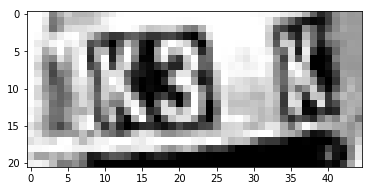

In [27]:
#计算方框的长和宽

temp_W = ((right_bottom[0][0]-left_bottom[0][0]) ** 2) + ((right_bottom[0][1]-left_bottom[0][1]) ** 2)
W = math.sqrt(temp_W)

temp_H = ((right_bottom[0][0]-right_top[0][0]) ** 2) + ((right_bottom[0][1]-right_top[0][1]) ** 2)
H = math.sqrt(temp_H)
print('方框的长宽为',W,H,'\n')

H_rows, W_cols= gray_img.shape[:2]
print('图像的长宽为',H_rows,W_cols,'\n')

#原图中的四个角点(左上、右上、左下、右下),与变换后矩阵位置
pts1 = np.float32([left_top, right_top, left_bottom, right_bottom])
pts2 = np.float32([[0, 0],[W_cols,0],[0, H_rows],[W_cols,H_rows]])
#pts2 = np.float32([[0, 0],[W,0],[0, H],[W,H]])

W,H = int(W),int(H)

M = cv2.getPerspectiveTransform(pts1, pts2)
# change = cv2.warpPerspective(gray_img, M, (W_cols,H_rows))
change = cv2.warpPerspective(gray_img, M, (W_cols,H_rows),borderMode = cv2.BORDER_CONSTANT, borderValue=(255,255,255))

change = cv2.resize(change,(W, H),fx = 0.6, fy = 0.6, interpolation = cv2.INTER_CUBIC)

# cv2.namedWindow("original_img",0)
# cv2.imshow("original_img",box_contours)
# cv2.namedWindow("result",0)
# cv2.imshow("result",change)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(change,'gray')

## 与原图对比

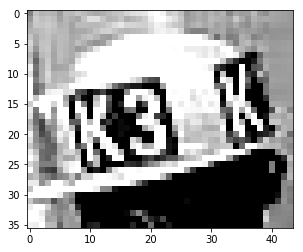

In [28]:
plt.imshow(gray_img,'gray')

# 对比度 感觉可以不加

In [29]:
#增加对比度
# enh_con = ImageEnhance.Contrast(change)
# contrast = 1
# image_contrasted = enh_con.enhance(contrast)

# # #增加锐度
# # enh_sha = ImageEnhance.Sharpness(change)
# # sharpness = 1
# # image_sharped = enh_sha.enhance(sharpness)

# img = np.array(image_contrasted)
# # cv2.namedWindow('img',0)
# # cv2.imshow('img', img)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()
# plt.imshow(img)

In [30]:
# hist = cv2.calcHist(blurred,[0],None,[255],[0,255])
# plt.plot(hist,'r')
# plt.title('hist')
# plt.show()


# 均值化

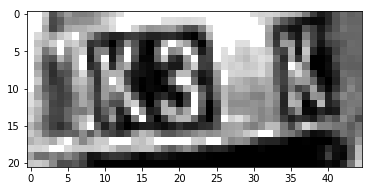

In [31]:
hist_equ = cv2.equalizeHist(change)
plt.imshow(hist_equ,'gray')

# 对提取的区域二值化

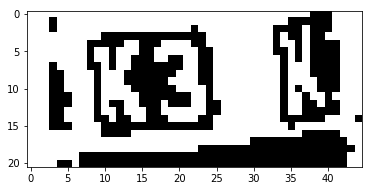

In [32]:
ret, binary = cv2.threshold(change, 0, 255, cv2.THRESH_OTSU)
#ret, binary = cv2.threshold(change,170,255,cv2.THRESH_BINARY)
plt.imshow(binary, 'gray')

# 去除小黑点

In [33]:
# kernelX1 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
# out_black = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernelX1)

# plt.imshow(out_black,'gray')


In [34]:
# cv2.namedWindow('box_contours', 0)
# cv2.imshow('box_contours',box_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 金字塔放大

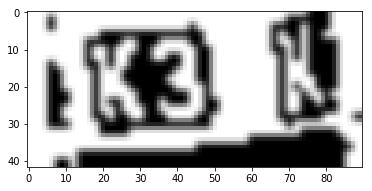

In [35]:
blur_img = cv2.pyrUp(binary)
plt.imshow(blur_img, 'gray')

## 低通滤波器模糊

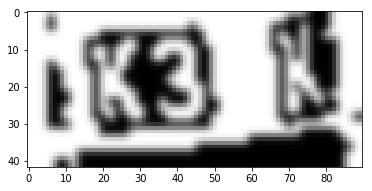

In [36]:
median = cv2.GaussianBlur(blur_img,(3,3),0)
plt.imshow(median,'gray')

## 增加对比度

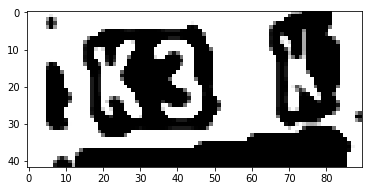

In [37]:
image_copy = Image.fromarray(median.astype('uint8')).convert('RGB')
enh_con = ImageEnhance.Contrast(image_copy)
contrast = 6
image_contrasted = enh_con.enhance(contrast)
image_touched = np.array(image_contrasted)
plt.imshow(image_touched)

# 第二轮矫正 

In [38]:
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
# out_black = cv2.morphologyEx(image_touched, cv2.MORPH_CLOSE, kernelX)
# plt.imshow(out_black,'gray')

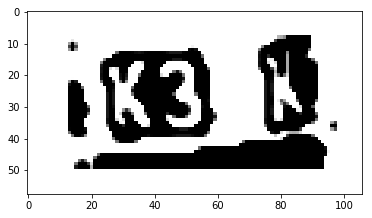

In [39]:

constant = cv2.copyMakeBorder(image_touched, 8,8,8,8, cv2.BORDER_CONSTANT, value=(255,255,255))
constant = cv2.copyMakeBorder(image_touched, 8,8,8,8, cv2.BORDER_CONSTANT, value=(255,255,255))
# # 显示面积筛选的轮廓
constant_copy = constant.copy()
constant_copy2 = constant.copy()
constant_copy3 = constant.copy()

plt.imshow(constant,'gray')

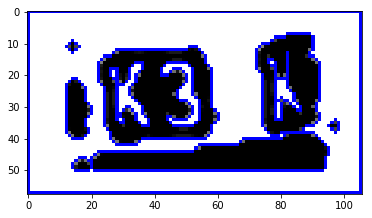

In [40]:
gray_out = cv2.cvtColor(constant,cv2.COLOR_BGR2GRAY)
ret, binary2 = cv2.threshold(gray_out, 0, 255, cv2.THRESH_OTSU)
img1, contours, hierarchy = cv2.findContours(binary2,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contour = cv2.drawContours(constant, contours, -1, (0, 0, 255), 1)
plt.imshow(img_contour,'gray')


In [41]:
print(len(contours))

12


In [42]:
for item in contours:
    print(cv2.contourArea(item))

5985.0
19.0
598.0
7.0
115.0
969.0
92.5
88.5
8.0
528.5
56.5
2.0


In [43]:
contours = [i for i in contours if (cv2.contourArea(i) <6000 and cv2.contourArea(i) > 700)]
print('筛选得到的轮廓个数为：',len(contours),'\n')
print('各个面积为:')
for i in contours:
    print(cv2.contourArea(i))

筛选得到的轮廓个数为： 2 

各个面积为:
5985.0
969.0


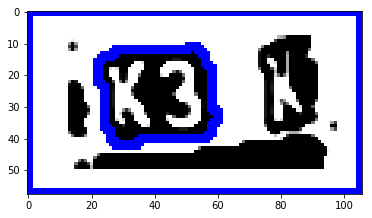

In [44]:
img_contour_2 = cv2.drawContours(constant_copy, contours, -1, (0, 0, 255), 2)
plt.imshow(img_contour_2,'gray')

point 0 : [105  57]
point 1 : [ 0 57]
point 2 : [0 0]
point 3 : [105   0]


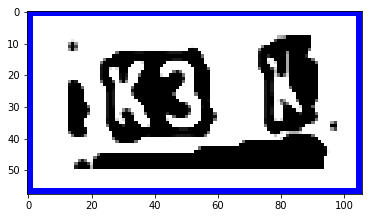

In [45]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)
rect_final = cv2.minAreaRect(contours[0])

box = cv2.boxPoints(rect_final)
box = np.int0(box)
for i,item in enumerate(box):
    print('point' , i, ':', item)

box_contours = cv2.drawContours(constant_copy2, [box], 0, (0, 0, 255), 2)
plt.imshow(constant_copy2)

In [46]:
box = box.tolist()
print(box)

[[105, 57], [0, 57], [0, 0], [105, 0]]


In [47]:
a = box
a = sorted(a)
left = []
left.append(a[0])
left.append(a[1])
print('left',left,'\n')

right = []
right.append(a[2])
right.append(a[3])
print('right',right,'\n')

def takeSecond(elem):
    return elem[1]
a = sorted(a,key=takeSecond)

top = []
top.append(a[0])
top.append(a[1])
print('top',top,'\n')

bottom = []
bottom.append(a[2])
bottom.append(a[3])
print('bottom',bottom,'\n')

#求交集
left_top = [var for var in top if var in left]
left_bottom = [var for var in bottom if var in left]
right_top = [var for var in top if var in right]
right_bottom = [var for var in bottom if var in right]
print(left_top, left_bottom, right_top, right_bottom)

left [[0, 0], [0, 57]] 

right [[105, 0], [105, 57]] 

top [[0, 0], [105, 0]] 

bottom [[0, 57], [105, 57]] 

[[0, 0]] [[0, 57]] [[105, 0]] [[105, 57]]


In [48]:
temp_W = ((right_bottom[0][0]-left_bottom[0][0]) ** 2) + ((right_bottom[0][1]-left_bottom[0][1]) ** 2)
W = math.sqrt(temp_W)

temp_H = ((right_bottom[0][0]-right_top[0][0]) ** 2) + ((right_bottom[0][1]-right_top[0][1]) ** 2)
H = math.sqrt(temp_H)
print('方框的长宽为',W,H,'\n')

H_rows, W_cols= constant_copy3.shape[:2]
print('图像的长宽为',H_rows,W_cols,'\n')

#原图中的四个角点(左上、右上、左下、右下),与变换后矩阵位置
pts1 = np.float32([left_top, right_top, left_bottom, right_bottom])
pts2 = np.float32([[0, 0],[W_cols,0],[0, H_rows],[W_cols,H_rows]])
#pts2 = np.float32([[0, 0],[W,0],[0, H],[W,H]])

W,H = int(W),int(H)

M = cv2.getPerspectiveTransform(pts1, pts2)

change_after = cv2.warpPerspective(constant_copy3, M, (W_cols,H_rows))
change_after1 = cv2.resize(change_after,(W, H), fx = 0.6, fy = 0.6, interpolation = cv2.INTER_CUBIC)




方框的长宽为 105.0 57.0 

图像的长宽为 58 106 



# 效果总对比

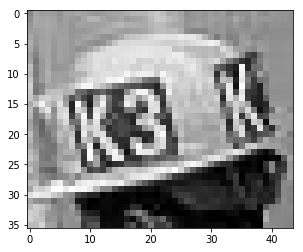

In [49]:
plt.imshow(raw_img)

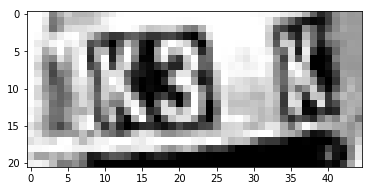

In [50]:
plt.imshow(change,'gray')

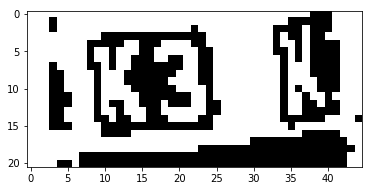

In [51]:
plt.imshow(binary,'gray')

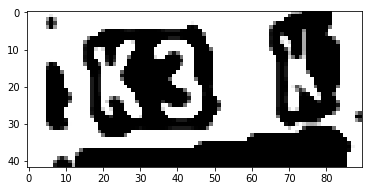

In [52]:
plt.imshow(image_touched)

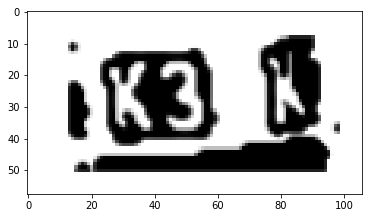

In [53]:
plt.imshow(change_after,'gray')

In [54]:
#cv2.imwrite('char9.jpg',change_after)